In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df_ls = pd.read_csv(r'/Users/andy.jensen/codeup-data-science/extra_files/Global_Landslide_Catalog_Export.csv')
df_ls

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.450000,32.562500
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.663000,45.420000
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.358700,-11.129500
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.708000,28.837800
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.897800,10.333600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,11109,04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,10845,03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,10973,12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,10901,04/29/2017 07:03:00 PM,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,NaN,NaN,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395


In [4]:
df_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                11033 non-null  object 
 1   source_link                10187 non-null  object 
 2   event_id                   11033 non-null  int64  
 3   event_date                 11033 non-null  object 
 4   event_time                 0 non-null      float64
 5   event_title                11033 non-null  object 
 6   event_description          10171 non-null  object 
 7   location_description       10931 non-null  object 
 8   location_accuracy          11031 non-null  object 
 9   landslide_category         11032 non-null  object 
 10  landslide_trigger          11010 non-null  object 
 11  landslide_size             11024 non-null  object 
 12  landslide_setting          10964 non-null  object 
 13  fatality_count             9648 non-null   flo

# Example using cartopy

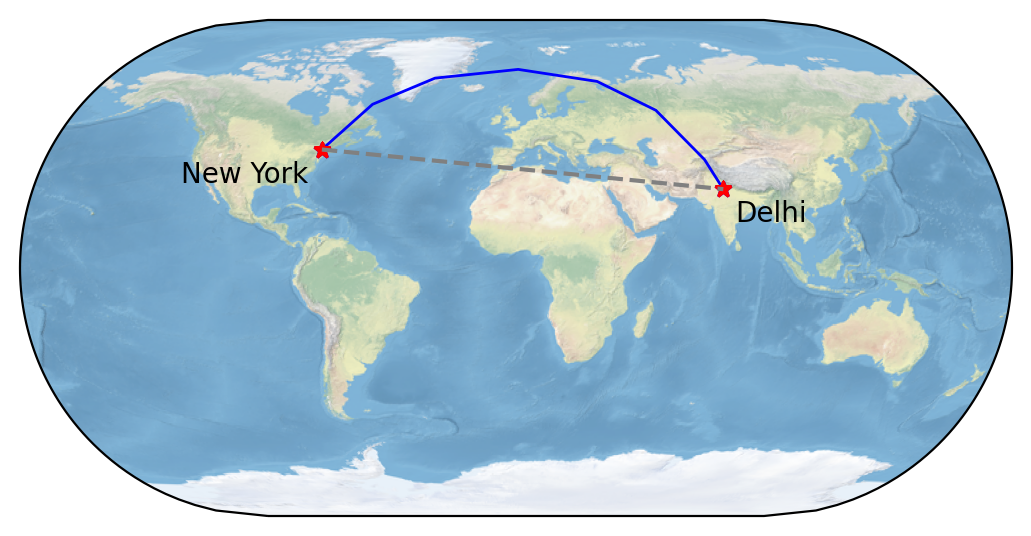

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
ax = plt.axes(projection=ccrs.EckertIII())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=1, marker='*',
         transform=ccrs.Geodetic(),
         )

plt.plot(delhi_lon, delhi_lat,
        color = 'red', marker = '*',
        transform = ccrs.Geodetic(),
        )
plt.plot(ny_lon, ny_lat,
        color = 'red', marker = '*',
        transform = ccrs.Geodetic(),
        )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='grey', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

# My example with the landslide data using cartopy

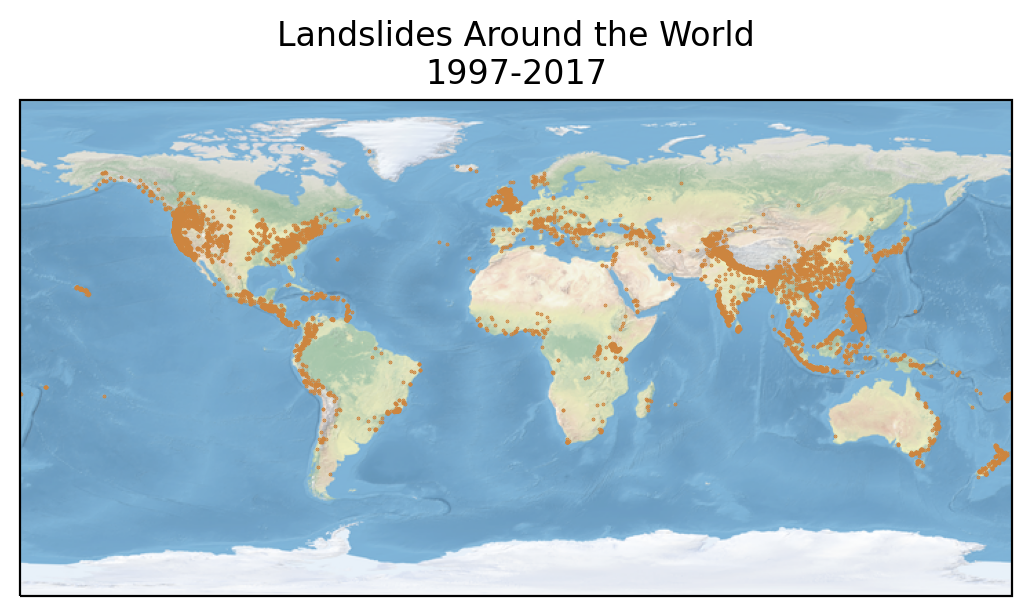

In [6]:
%config InlineBackend.figure_format = 'retina'
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

lon= df_ls['longitude']
lat = df_ls['latitude']


plt.scatter(lon, lat,
        color = 'peru', marker = '.', s = .5, 
        transform = ccrs.Geodetic(),
        )
plt.title('Landslides Around the World\n1997-2017',)
plt.show()

# Column 'Event Time' has no values so .drop() the column.

In [8]:
df_ls['event_time'].nunique()

0

In [ ]:
df_ls = df_ls.drop(columns = 'event_time')

In [15]:
df_ls.head()

,source_name,source_link,event_id,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


# Change 'event_date' to a datetime type instead of string

In [9]:
df_ls['event_date'].max()

'12/31/2016 04:08:00 PM'

In [16]:
df_ls[df_ls['source_name']=='The Times of India'].tail()

,source_name,source_link,event_id,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
10405,The Times of India,http://timesofindia.indiatimes.com/city/dehrad...,10821,12/26/2016 04:02:00 PM,Fatal landslide in Banihal,Landslide kills Indian soldier in Banihal (art...,"Banihal, Ramban, Jammu & Kashmir, India",1km,landslide,unknown,...,NaN,NaN,NaN,NaN,NaN,07/21/2017 03:02:00 PM,12/05/2017 06:40:00 PM,02/15/2018 03:51:00 PM,75.190674,33.435376
10874,The Times of India,http://timesofindia.indiatimes.com/city/chandi...,10856,03/22/2017 07:32:00 PM,JCB Helper Dies in Sainj Landslide,The helper of a JCB machine operator was kille...,"Sainj, Kullu, Himachal Pradesh",5km,landslide,construction,...,NaN,NaN,NaN,NaN,NaN,09/26/2017 07:32:00 PM,12/05/2017 06:57:00 PM,02/15/2018 03:51:00 PM,77.304714,31.773157
10911,The Times of India,https://timesofindia.indiatimes.com/city/salem...,10723,02/03/2017 08:07:00 PM,Salem-Yercaud Ghat Road Landslide on Hairpin Bend,A 38-year-old man died in a landslide while in...,"SH-188, Yercaud, Salem, Tamil Nadu, 636601",exact,landslide,construction,...,NaN,NaN,NaN,NaN,NaN,10/25/2017 07:07:00 PM,12/01/2017 10:55:00 PM,02/15/2018 03:51:00 PM,78.193880,11.781272
11003,The Times of India,http://timesofindia.indiatimes.com/city/coimba...,10729,12/16/2016 01:22:00 PM,Landslide on Railway,Nilgiris Mountain Rail services have been susp...,Railway between Kallar and Hillgrove,10km,landslide,tropical_cyclone,...,NaN,NaN,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/01/2017 11:10:00 PM,02/15/2018 03:51:00 PM,76.903045,11.328578
11032,The Times of India,https://timesofindia.indiatimes.com/city/hyder...,10949,03/13/2017 02:32:00 PM,Kondapur Commercial Complex Construction Mudslide,A mudslide at an under-construction commercial...,"Hyderabad, Rangareddy, Telangana",1km,mudslide,construction,...,NaN,NaN,NaN,NaN,NaN,10/05/2017 02:32:00 PM,12/08/2017 07:57:00 PM,02/15/2018 03:51:00 PM,78.356505,17.465630


In [37]:
pd.to_datetime(df_ls.event_date, infer_datetime_format=True)
df_ls.head()

,source_name,source_link,event_id,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [38]:
type(df_ls['event_date'][0])

str

In [31]:
df_ls['event_date'].max()

'12/31/2016 04:08:00 PM'

In [30]:
df_ls.dtypes

source_name                   object
source_link                   object
event_id                       int64
event_date                    object
event_title                   object
event_description             object
location_description          object
location_accuracy             object
landslide_category            object
landslide_trigger             object
landslide_size                object
landslide_setting             object
fatality_count               float64
injury_count                 float64
storm_name                    object
photo_link                    object
notes                         object
event_import_source           object
event_import_id              float64
country_name                  object
country_code                  object
admin_division_name           object
admin_division_population    float64
gazeteer_closest_point        object
gazeteer_distance            float64
submitted_date                object
created_date                  object
l

In [ ]:
df_ls['event_time'] = df_ls['event_date']

In [ ]:
df_ls.split(df_ls['event_date'])